# Contents:
01. Import Libraries
02. Import Data
03. Business Questions

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
# define path
path = r'/Users/lavinia/Documents/04-2020 Instacart Basket Analysis'

In [3]:
# import project_final_merged data
df_project_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_final_merged.pkl'))

In [4]:
# configure pandas to display all columns
pd.set_option('display.max_column', None)

# 03. Business Questions

## The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

In [5]:
# count order number by days of the week
count_order_by_day = df_project_final.groupby('order_day_of_week')['order_id'].nunique()

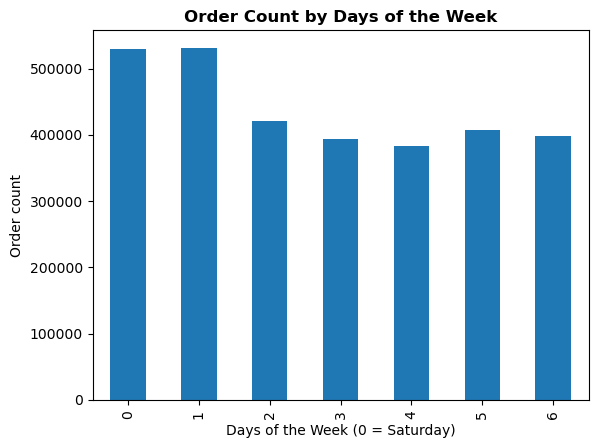

In [6]:
# create a bar chat to visualize the order distribution in a week
busiest_day = count_order_by_day.plot.bar()

# customize the plot
plt.xlabel('Days of the Week (0 = Saturday)')
plt.ylabel('Order count')
plt.title('Order Count by Days of the Week', fontweight='bold')

# show the plot
plt.show()

In [7]:
# count order number by hours of the day
count_order_by_hour = df_project_final.groupby('order_hour_of_day')['order_id'].nunique()

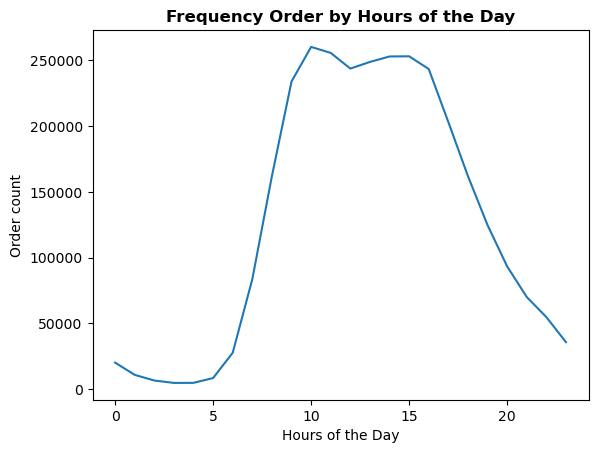

In [34]:
# create a line chart to visualize the order distribution in a day
busiest_hour = sns.lineplot(x=count_order_by_hour.index, y=count_order_by_hour.values)

# customize the plot
plt.xlabel('Hours of the Day')
plt.ylabel('Order count')
plt.title('Frequency Order by Hours of the Day', fontweight='bold')

# show the plot
plt.show()

Answers: The busiest days of the week are Saturday and Sunday and the busiest hours of the days are from 9 to 16.

## They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [9]:
# create a sales column
df_project_final['sales'] = df_project_final['add_to_cart_order'] * df_project_final['prices']

In [43]:
# calculate the average of sales grouped by day of the week
sales_by_day = df_project_final.groupby('order_day_of_week')['sales'].mean()

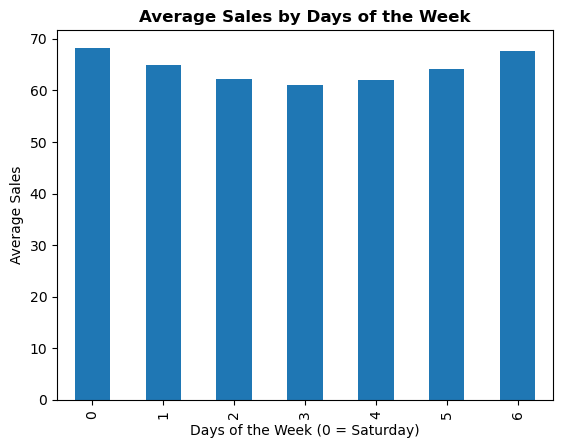

In [45]:
# create a bar chart to visualize the average sales distribution in a week
spending_day = sales_by_day.plot.bar()

# customize the plot
plt.xlabel('Days of the Week (0 = Saturday)')
plt.ylabel('Average Sales')
plt.title('Average Sales by Days of the Week', fontweight='bold')

# show the plot
plt.show()

In [40]:
# calculate the average of sales grouped by hours of the day
sales_by_hour = df_project_final.groupby('order_hour_of_day')['sales'].mean()

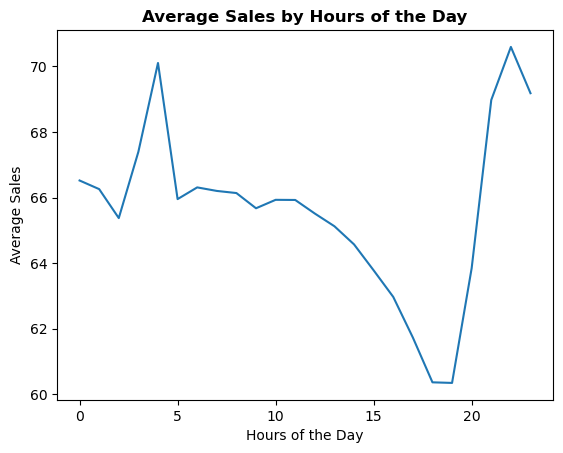

In [44]:
# create a line chart to visualize the average sales distribution in a day
spending_hour = sns.lineplot(x=sales_by_hour.index, y= sales_by_hour.values)

# customize the plot
plt.xlabel('Hours of the Day')
plt.ylabel('Average Sales')
plt.title('Average Sales by Hours of the Day', fontweight='bold')

# show the plot
plt.show()

Answer: Sales started to peak at 3-5 and 20-23

## Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Answer: Exercise 4.7
Price range groupings:
- for items with price <= 5, labeled as 'Low-range product'
- for items with price > 5 and price <= 15, labeled as 'Mid-range product'
- for items with price > 15, labeled as 'High-range product'

In [12]:
# calculate the frequency of each labeling
df_project_final['price_range_loc'].value_counts(dropna = False)

Mid-range product       20891771
Low-range product        9674840
Higher-range product      397953
Name: price_range_loc, dtype: int64

## Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [13]:
# calculate the frequency of orders in each department
dep_freq_order = df_project_final['department'].value_counts(dropna = False)

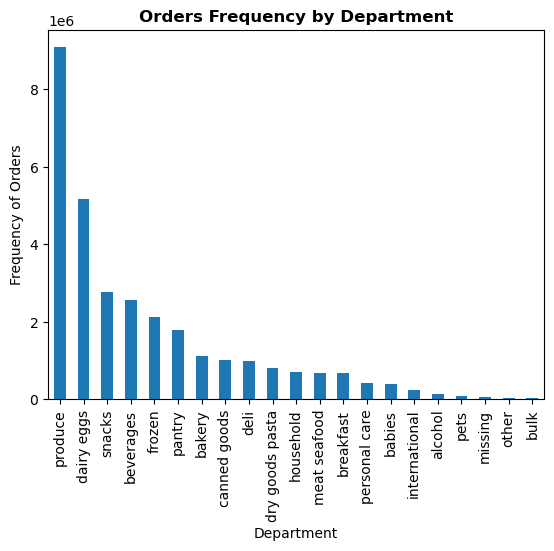

In [14]:
# create a bar chat to visualize the frequency of product orders for each department
order_bydept = dep_freq_order.plot.bar()

# customize the plot
plt.xlabel('Department')
plt.ylabel('Frequency of Orders')
plt.title('Orders Frequency by Department', fontweight='bold')

# show the plot
plt.show()

Answer: There are three departments with the highest frequency of product orders: produce, dairy, snacks, meaning products from the these departments are more popular than others

## The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:

### What's the distribution among users in regards to their brand loyalty 

In [15]:
# create an unique user dataframe based on their loyalty_flag
unique_loyalty_flag = df_project_final.drop_duplicates(subset='user_id')

In [16]:
# calculate the frequency of each loyalty status 
loyalty_freq = unique_loyalty_flag['loyalty_flag'].value_counts(dropna = False)

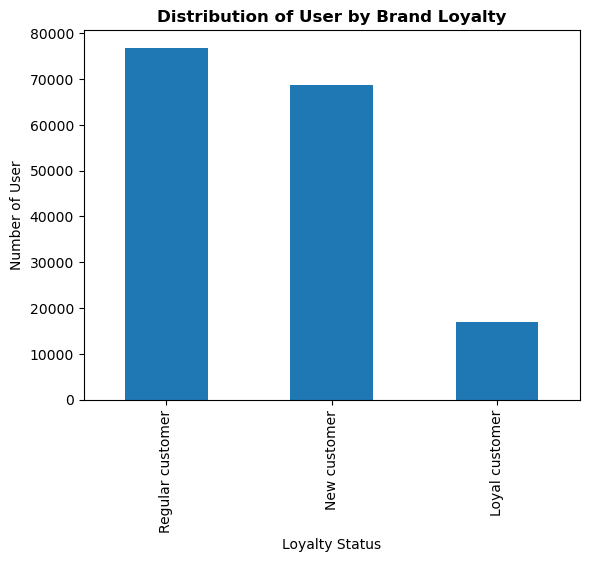

In [17]:
# create a bar chart to visualize the distribution of users in regards to their brand loyalty
loyalty_freq_chart = loyalty_freq.plot.bar()

# customize the plot
plt.xlabel('Loyalty Status')
plt.ylabel('Number of User')
plt.title('Distribution of User by Brand Loyalty', fontweight='bold')

# show the plot
plt.show()

### Are there differences in ordering habits based on a customer’s loyalty status?

#### By frequency of orders

In [18]:
# create a crosstab between the "loyalty_flag" column and the "frequency_flag" column
crosstab_loyalty_frequency = pd.crosstab(df_project_final['loyalty_flag'], df_project_final['frequency_flag'], normalize = 'index', dropna = False)
crosstab_loyalty_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,0.999598,0.000000,0.000402
New customer,0.269229,0.412911,0.317860
Regular customer,0.606623,0.057409,0.335967


In [19]:
# check the basic statistics of the median_frequency for each loyalty category
df_project_final.groupby('loyalty_flag')['median_freq'].describe()

,count,mean,std,min,25%,50%,75%,max
loyalty_flag,,,,,,,,
Loyal customer,10284093.0,5.170559,1.703377,0.0,4.0,5.0,7.0,14.0
New customer,4803695.0,18.037059,8.895072,0.0,10.0,17.0,28.0,30.0
Regular customer,15876776.0,10.612951,5.081751,0.0,7.0,9.0,13.0,30.0


In [48]:
# calculate the average of median_frequency for each loyalty category
loyalty_flag_median = df_project_final.groupby('loyalty_flag')['median_freq'].mean()

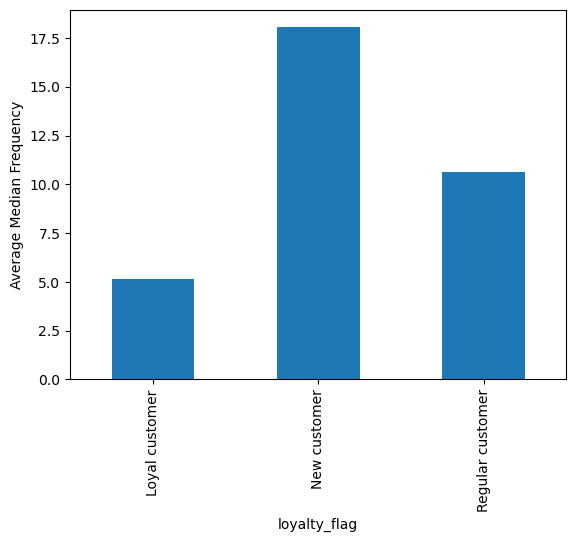

In [49]:
# create a bar chart to visualize 
loyalty_median = loyalty_flag_median.plot.bar()

# customize the plot
plt.ylabel('Average Median Frequency')

# show the plot
plt.show()

Answer: As expected, loyal customers have the lowest average median of “days_since_prior_order” of around 5.2 days when compared to regular customers who have an average of 10.6 days, while new customers have an average of around 18 days before their next order.

#### By price of products

In [20]:
# create a crosstab between the "loyalty_flag" column and the "price_range_loc" column
crosstab_loyalty_pricerange = pd.crosstab(df_project_final['loyalty_flag'], df_project_final['price_range_loc'], normalize = 'index', dropna = False)
crosstab_loyalty_pricerange

price_range_loc,Higher-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,0.011662,0.312589,0.675749
New customer,0.013724,0.312528,0.673748
Regular customer,0.013359,0.312334,0.674307


In [21]:
# check the basic statistics of the product prices for each loyalty category
df_project_final.groupby('loyalty_flag')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
loyalty_flag,,,,,,,,
Loyal customer,10282763.0,7.773575,4.206151,1.0,4.2,7.4,11.2,25.0
New customer,4802796.0,7.801665,4.266539,1.0,4.2,7.4,11.3,25.0
Regular customer,15874128.0,7.798262,4.254886,1.0,4.2,7.4,11.3,25.0


In [51]:
# calculate the average of product prices for each loyalty category
loyalty_flag_prices = df_project_final.groupby('loyalty_flag')['prices'].mean()

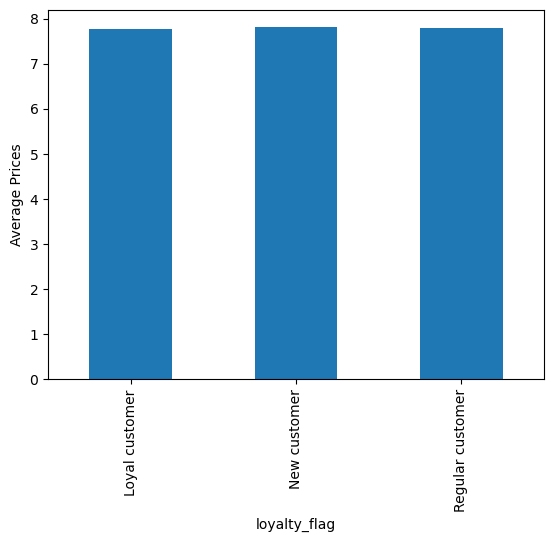

In [52]:
# create a bar chart to visualize 
loyalty_prices = loyalty_flag_prices.plot.bar()

# customize the plot
plt.ylabel('Average Prices')

# show the plot
plt.show()

Answer: for each loyalty group of customers, loyal customers have slightly lower mean products price than regular and new customers, with new customers having a slightly higher average products price. 

### Are there differences in ordering habits based on a customer’s region?

#### By frequency of orders

In [22]:
# create a crosstab between the "Region" column and the "frequency_flag" column
crosstab_region_frequency = pd.crosstab(df_project_final['Region'], df_project_final['frequency_flag'], normalize = 'index', dropna = False)
crosstab_region_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Region,,,
Midwest,0.679665,0.095026,0.225310
Northeast,0.684574,0.090931,0.224495
South,0.686034,0.093880,0.220087
West,0.688048,0.093353,0.218599


In [23]:
# check the basic statistics of the median_frequency for each region
df_project_final.groupby('Region')['median_freq'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Midwest,7261513.0,10.019931,6.666584,0.0,6.0,8.0,13.0,30.0
Northeast,5464685.0,9.924985,6.648287,0.0,6.0,7.0,12.0,30.0
South,10311139.0,9.955835,6.674406,0.0,6.0,7.0,12.5,30.0
West,7927227.0,9.923485,6.666844,0.0,6.0,7.0,12.0,30.0


In [54]:
# calculate the average of median_frequency for each region
region_flag_median = df_project_final.groupby('Region')['median_freq'].mean()

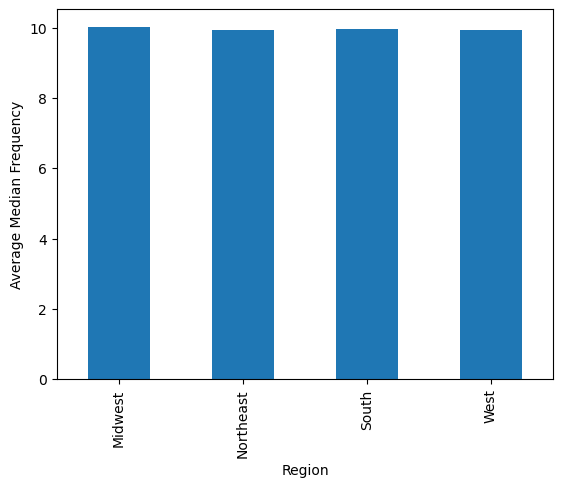

In [55]:
# create a bar chart to visualize 
region_median = region_flag_median.plot.bar()

# customize the plot
plt.ylabel('Average Median Frequency')

# show the plot
plt.show()

#### By price of orders

In [24]:
# create a crosstab between the "Region" column and the "price_range_loc" column
pd.crosstab(df_project_final['Region'],df_project_final['price_range_loc'], normalize = 'index', dropna = False)

price_range_loc,Higher-range product,Low-range product,Mid-range product
Region,,,
Midwest,0.012846,0.312206,0.674949
Northeast,0.012760,0.313350,0.673889
South,0.012866,0.312041,0.675093
West,0.012902,0.312580,0.674517


In [25]:
# check the basic statistics of the product prices for each region
df_project_final.groupby('Region')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Midwest,7260306.0,7.792318,4.239007,1.0,4.2,7.4,11.3,25.0
Northeast,5463882.0,7.781441,4.241014,1.0,4.2,7.4,11.2,25.0
South,10309442.0,7.794439,4.241328,1.0,4.2,7.4,11.3,25.0
West,7926057.0,7.790308,4.240798,1.0,4.2,7.4,11.2,25.0


In [56]:
# calculate the average of product prices for each region
region_flag_prices = df_project_final.groupby('Region')['prices'].mean()

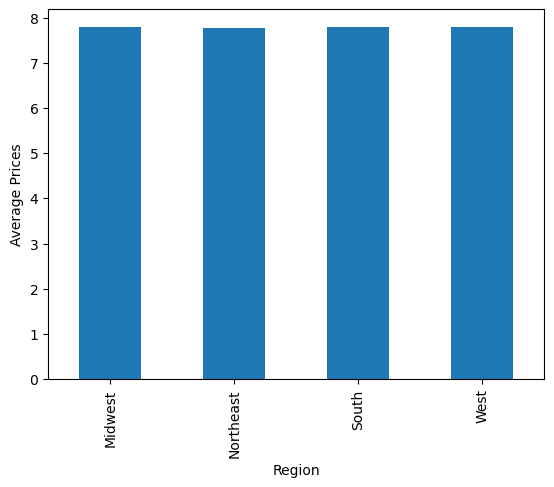

In [57]:
# create a bar chart to visualize 
region_prices = region_flag_prices.plot.bar()

# customize the plot
plt.ylabel('Average Prices')

# show the plot
plt.show()

Answer: In terms of median of “days_since_prior_order”, The Midwest region's customers purchase frequency is slightly longer of around 10 days compared to the rest of regions. The average prices of product spent is almost similar across all regions, with the South region having a slightly higher mean price than the rest.

### Is there a connection between age and family status in terms of ordering habits?

In [26]:
# define the desired order of age_flag categories
age_order = ['Young Adults', 'Middle-aged Adults', 'Senior Adults']

In [27]:
# define the desired order of status_flag
status_order = ['Married with dependants', 'Married no dependants', 'Single with dependants', 'Single no dependants']

In [59]:
# create a crosstab between the "age_flag" column and the "status_flag" column
crosstab_age_status = pd.crosstab(df_project_final['age_flag'], df_project_final['status_flag'], normalize = 'index', dropna = False).loc[age_order, status_order]
crosstab_age_status

status_flag,Married with dependants,Married no dependants,Single with dependants,Single no dependants
age_flag,,,,
Young Adults,0.391204,0.190105,0.169494,0.249198
Middle-aged Adults,0.496900,0.254399,0.000000,0.248701
Senior Adults,0.502497,0.246050,0.000000,0.251453


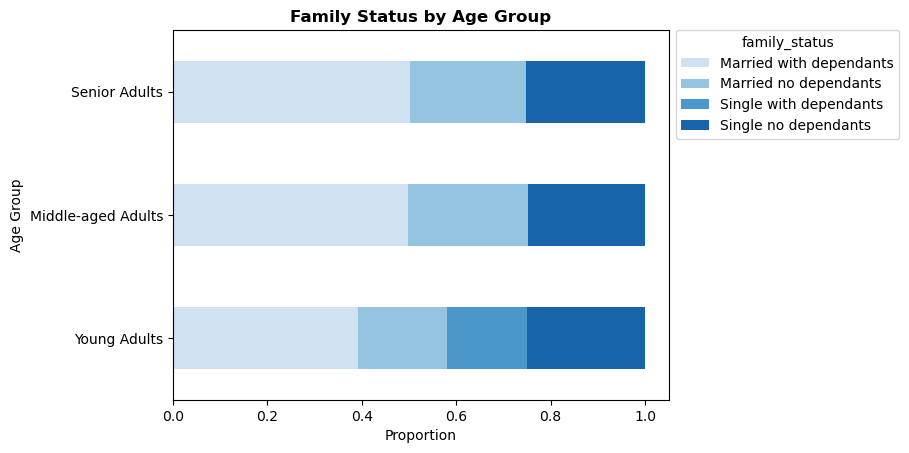

In [81]:
# create the visualization of Family Status by Age Group
age_status = crosstab_age_status.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 4))

# customize the plot
plt.xlabel('Proportion')
plt.ylabel('Age Group')
plt.title('Family Status by Age Group', fontweight='bold')
plt.legend(title ='family_status', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

Observation: Single with dependants customers are not observed among middle-aged and senior adult groups.

In [31]:
# check the basic statistics of the median frequency for each age and family status category
df_project_final.groupby(['age_flag', 'status_flag'])['median_freq'].describe()

count       mean       std  \
age_flag           status_flag                                               
Middle-aged Adults Married no dependants    2472113.0   9.903597  6.678616   
                   Married with dependants  4828606.0   9.969405  6.644907   
                   Single no dependants     2416742.0   9.971151  6.664792   
Senior Adults      Married no dependants    3077661.0  10.041247  6.740264   
                   Married with dependants  6285388.0   9.970148  6.681483   
                   Single no dependants     3145249.0   9.833876  6.647824   
Young Adults       Married no dependants    1661287.0   9.985291  6.651437   
                   Married with dependants  3418656.0   9.949560  6.628218   
                   Single no dependants     2177690.0  10.046510  6.653238   
                   Single with dependants   1481172.0   9.869971  6.652506   

                                            min  25%  50%   75%   max  
age_flag           status_flag                                         
Middle-aged Adults Married no dependants    0.0  6.0  7.0  12.0  30.0  
                   Married with dependants  0.0  6.0  8.0  13.0  30.0  
                   Single no dependants     0.0  6.0  7.0  13.0  30.0  
Senior Adults      Married no dependants    0.0  6.0  7.5  13.0  30.0  
                   Married with dependants  0.0  6.0  7.0  13.0  30.0  
                   Single no dependants     0.0  6.0  7.0  12.0  30.0  
Young Adults       Married no dependants    0.0  6.0  8.0  12.0  30.0  
                   Married with dependants  0.0  6.0  7.0  12.5  30.0  
                   Single no dependants     0.0  6.0  8.0  13.0  30.0  
                   Single with dependants   0.0  6.0  7.0  12.0  30.0

In [69]:
# calculate the average of median_frequency 
age_famstatus_median = df_project_final.groupby(['age_flag', 'status_flag'])['median_freq'].mean().reset_index()
age_famstatus_median

,age_flag,status_flag,median_freq
0,Middle-aged Adults,Married no dependants,9.903597
1,Middle-aged Adults,Married with dependants,9.969405
2,Middle-aged Adults,Single no dependants,9.971151
3,Senior Adults,Married no dependants,10.041247
4,Senior Adults,Married with dependants,9.970148
5,Senior Adults,Single no dependants,9.833876
6,Young Adults,Married no dependants,9.985291
7,Young Adults,Married with dependants,9.949560
8,Young Adults,Single no dependants,10.046510
9,Young Adults,Single with dependants,9.869971


In [72]:
# pivot the age_famstatus_median
pivot_age_famstatus_median = age_famstatus_median.pivot(index='age_flag', columns='status_flag', values = 'median_freq')
pivot_age_famstatus_median

status_flag,Married no dependants,Married with dependants,Single no dependants,Single with dependants
age_flag,,,,
Middle-aged Adults,9.903597,9.969405,9.971151,NaN
Senior Adults,10.041247,9.970148,9.833876,NaN
Young Adults,9.985291,9.949560,10.046510,9.869971


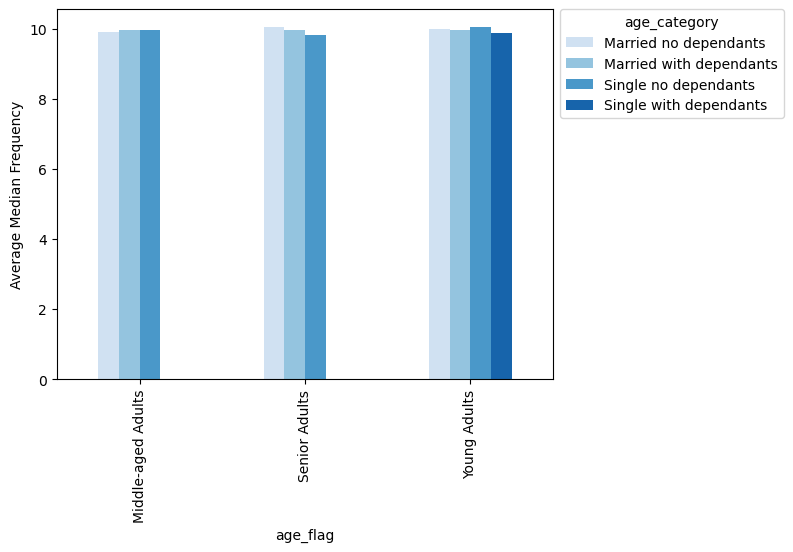

In [76]:
# create a bar chart to visualize 
age_famstatus_median_chart = pivot_age_famstatus_median.plot(kind = 'bar', color = sns.color_palette('Blues', 4))

# customize the plot
plt.ylabel('Average Median Frequency')
plt.legend(title ='age_category', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

In [32]:
# check the basic statistics of the product prices for each age and family status category
df_project_final.groupby(['age_flag', 'status_flag'])['prices'].describe()

count      mean       std  \
age_flag           status_flag                                              
Middle-aged Adults Married no dependants    2471761.0  7.792344  4.238654   
                   Married with dependants  4827849.0  7.789727  4.243419   
                   Single no dependants     2416395.0  7.786488  4.233754   
Senior Adults      Married no dependants    3077156.0  7.800465  4.243407   
                   Married with dependants  6284384.0  7.792285  4.245712   
                   Single no dependants     3144746.0  7.798265  4.239710   
Young Adults       Married no dependants    1661049.0  7.791383  4.238127   
                   Married with dependants  3418001.0  7.776166  4.240007   
                   Single no dependants     2177367.0  7.780360  4.229423   
                   Single with dependants   1480979.0  7.800604  4.240502   

                                            min  25%  50%   75%   max  
age_flag           status_flag                                         
Middle-aged Adults Married no dependants    1.0  4.2  7.4  11.2  25.0  
                   Married with dependants  1.0  4.2  7.4  11.3  25.0  
                   Single no dependants     1.0  4.2  7.4  11.2  25.0  
Senior Adults      Married no dependants    1.0  4.2  7.4  11.3  25.0  
                   Married with dependants  1.0  4.2  7.4  11.3  25.0  
                   Single no dependants     1.0  4.2  7.4  11.3  25.0  
Young Adults       Married no dependants    1.0  4.2  7.4  11.3  25.0  
                   Married with dependants  1.0  4.2  7.3  11.2  25.0  
                   Single no dependants     1.0  4.2  7.4  11.2  25.0  
                   Single with dependants   1.0  4.2  7.4  11.3  25.0

In [77]:
# calculate the average of the product prices
age_famstatus_prices = df_project_final.groupby(['age_flag', 'status_flag'])['prices'].mean().reset_index()
age_famstatus_prices

,age_flag,status_flag,prices
0,Middle-aged Adults,Married no dependants,7.792344
1,Middle-aged Adults,Married with dependants,7.789727
2,Middle-aged Adults,Single no dependants,7.786488
3,Senior Adults,Married no dependants,7.800465
4,Senior Adults,Married with dependants,7.792285
5,Senior Adults,Single no dependants,7.798265
6,Young Adults,Married no dependants,7.791383
7,Young Adults,Married with dependants,7.776166
8,Young Adults,Single no dependants,7.780360
9,Young Adults,Single with dependants,7.800604


In [78]:
# pivot the age_famstatus_prices
pivot_age_famstatus_prices = age_famstatus_prices.pivot(index='age_flag', columns='status_flag', values = 'prices')
pivot_age_famstatus_prices

status_flag,Married no dependants,Married with dependants,Single no dependants,Single with dependants
age_flag,,,,
Middle-aged Adults,7.792344,7.789727,7.786488,NaN
Senior Adults,7.800465,7.792285,7.798265,NaN
Young Adults,7.791383,7.776166,7.780360,7.800604


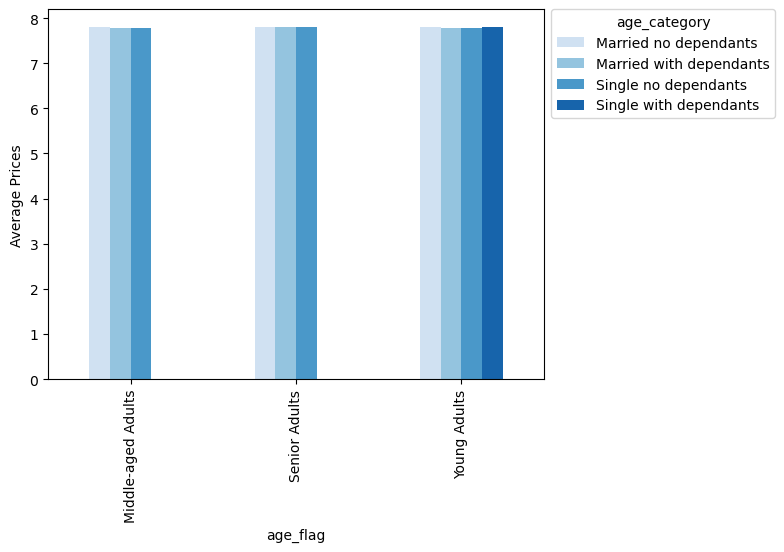

In [80]:
# create a bar chart to visualize 
age_famstatus_prices_chart = pivot_age_famstatus_prices.plot(kind = 'bar', color = sns.color_palette('Blues', 4))

# customize the plot
plt.ylabel('Average Prices')
plt.legend(title ='age_category', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

### What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

Answer: Age, income, department, and family status